In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking for missing values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Removing mssing values from Cabin, Age, Embarked

In [5]:
data.dropna(subset=['Age', 'Cabin', 'Embarked'], inplace=True)

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Performing EDA

In [7]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [8]:
data['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

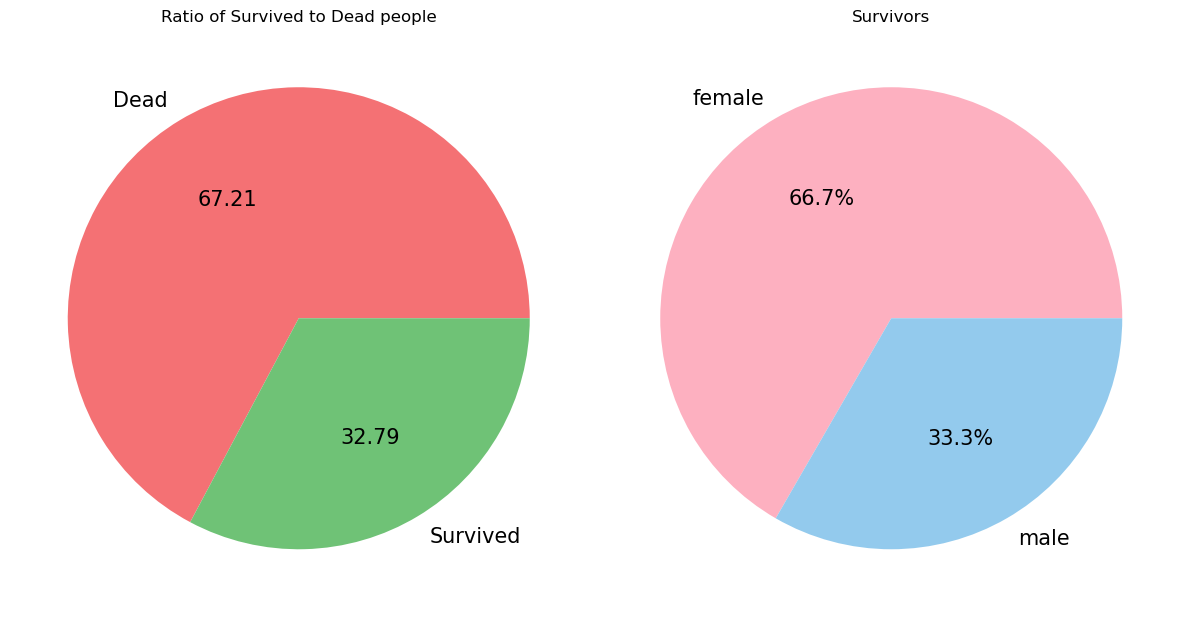

In [9]:
#creating figure with two subplots(1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12,8))

axs[0].pie(data['Survived'].value_counts(), labels=['Dead', 'Survived'], autopct= "%2.2f", 
           colors=['#F47174','#6FC276'], textprops={'fontsize':15})
axs[0].set_title("Ratio of Survived to Dead people")

gender_counts = data[data['Survived'] == 1]['Sex'].value_counts()
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
           colors=['#fdb0c0', '#93CAED'], textprops={'fontsize':15})
axs[1].set_title("Survivors")

plt.tight_layout()
plt.show()

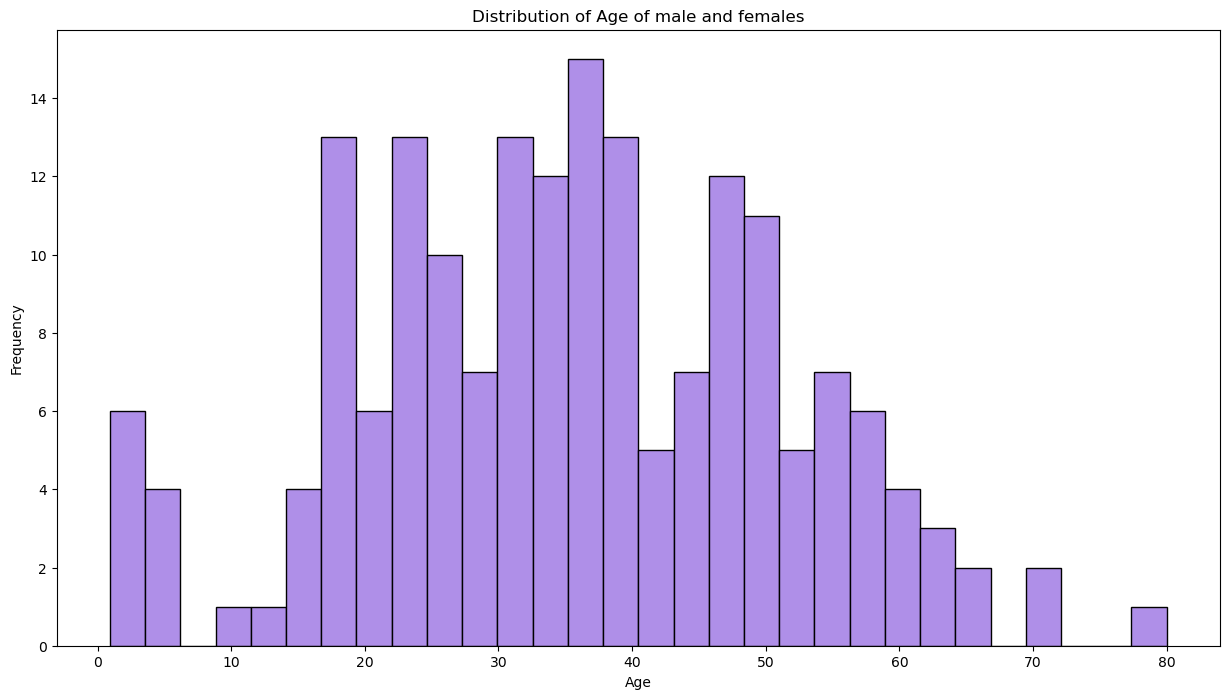

In [10]:
plt.figure(figsize = (15,8))
plt.hist(data['Age'].dropna(), bins = 30, color = '#AF8FE8', edgecolor = 'black')
plt.title("Distribution of Age of male and females")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

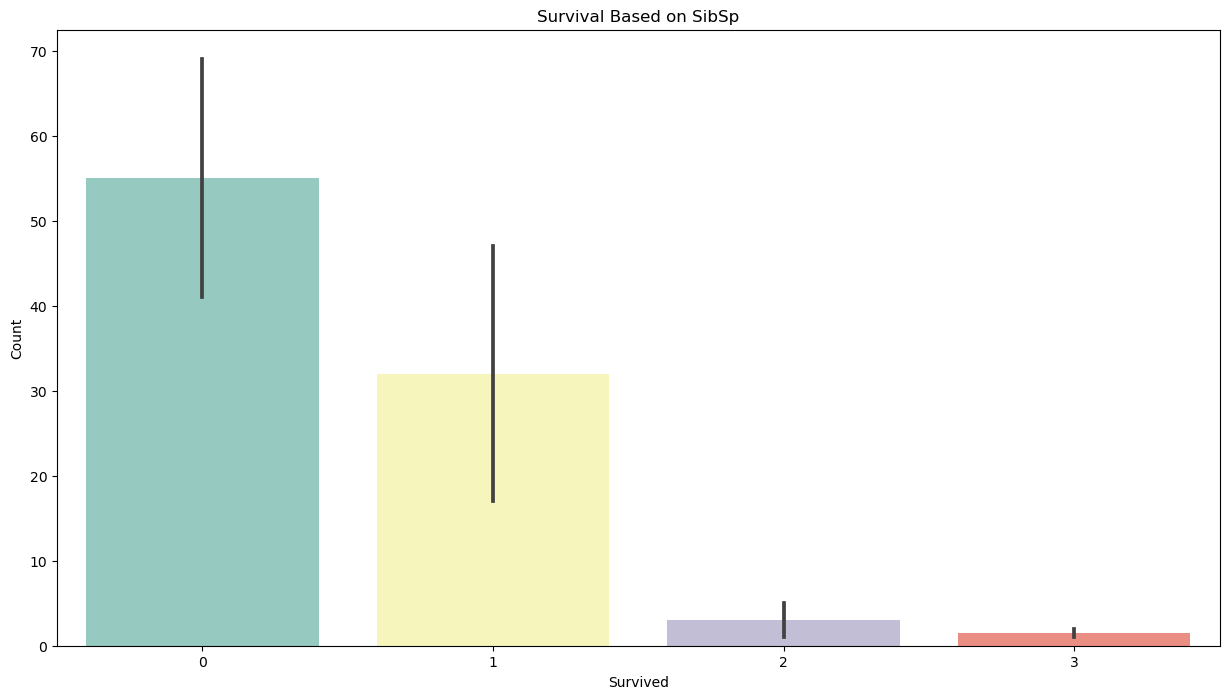

In [11]:
cross_tab=pd.crosstab(data['Survived'], data['SibSp'])

plt.figure(figsize=(15,8))

sns.barplot(data=cross_tab, palette="Set3")

plt.title('Survival Based on SibSp')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8308\811506308.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="spring")


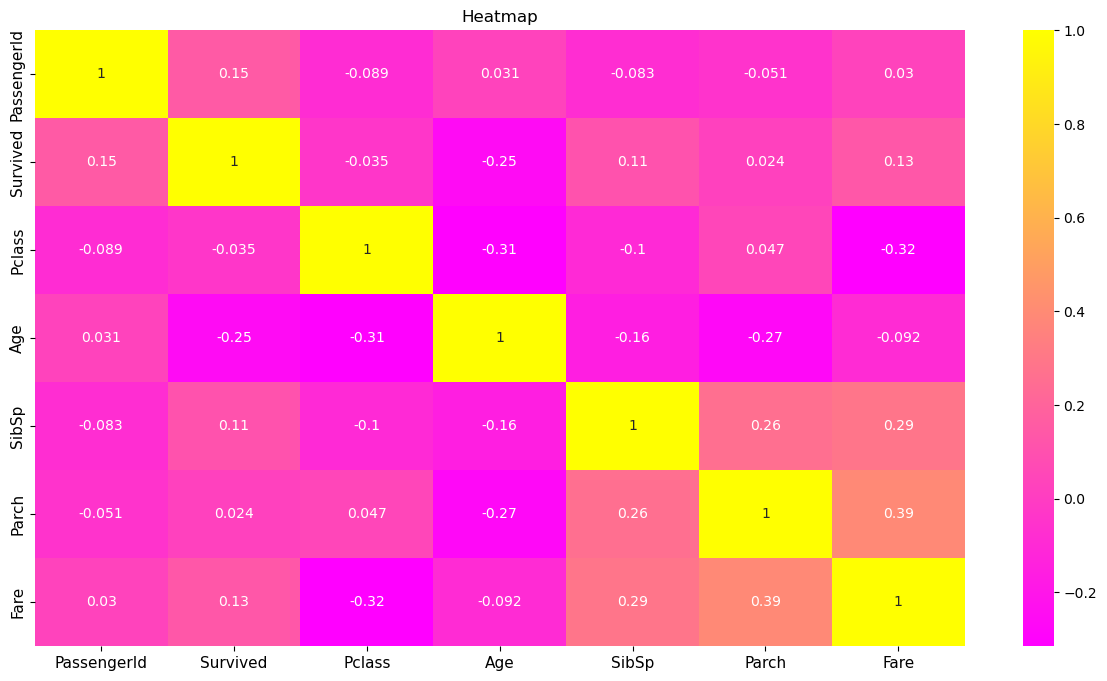

In [13]:
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(), annot=True, cmap="spring")

plt.title("Heatmap")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()